In [1]:
import pandas as pd
import numpy as np

In [17]:
class Perceptron(object):
    '''
    params 
    -----
    eta : float, learning rate
    n_iter : int number of iteration
    random_state : int 
    
    properties
    -----
    w_ : 1d array weights
    errors_ : list errors 
    
    '''
    
    def __init__(self, eta = .01, n_iter = 50, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''
        fit model to train data
        
        Params :
        X : array-like, shpe = [n_sample, n_features]
        y : array-like, shape = n_samples
        
        return
        self: object
        '''
    
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = .01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
import os
import pandas as pd

In [6]:
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df = pd.read_csv(s, header=None, encoding  = 'utf-8')

In [7]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
import matplotlib.pyplot as plt

In [9]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
len(y)

100

In [11]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

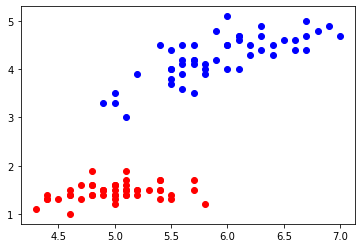

In [13]:
plt.scatter(X[:50, 0], X[:50,1], color = 'red', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100,1], color = 'blue', label = 'versicolor')
plt.show()

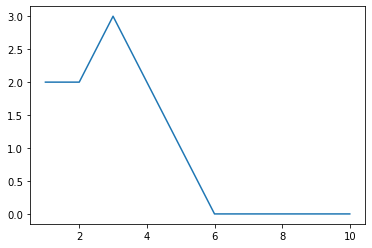

In [19]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, clf, res = 0.02):
    
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res),
                           np.arange(x2_min, x2_max, res))
    
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = .3, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                   y = X[y==cl,1], 
                   alpha = .8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

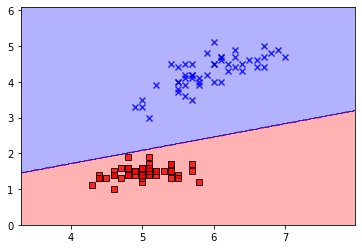

In [25]:
plot_decision_regions(X, y, clf = ppn)

In [31]:
class AdalineGD(object):
    def __init__(self, eta = .01, n_iter = 50, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = .0, scale = .01, size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
    #Adaline은 활성화함수가 그냥 X를 반환하는것임.
        return X
    
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

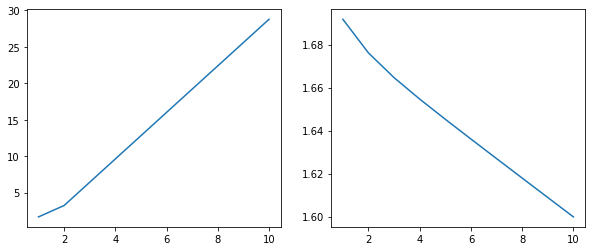

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

ada1 = AdalineGD(n_iter = 10, eta = .01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))

ada2 = AdalineGD(n_iter = 10, eta = .0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))

In [36]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:, 1 ].std()

In [37]:
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

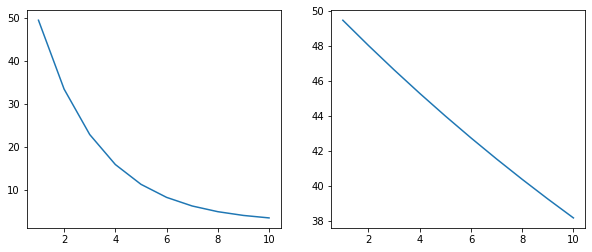

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

ada1 = AdalineGD(n_iter = 10, eta = .01).fit(X_std,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_)

ada2 = AdalineGD(n_iter = 10, eta = .0001).fit(X_std,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_)

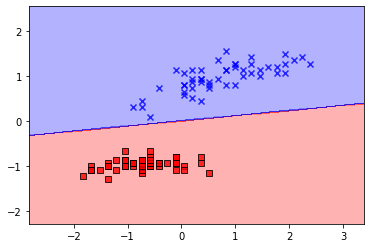

In [40]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, clf = ada)

In [109]:
class StochasticGD(object):
    def __init__(self, eta = .01, n_iter = 50, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = .0, scale = .01, size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            radi = rgen.randint(len(X))
            radx, error = X[radi, :], y[radi] - output[radi]
            self.w_[0] += self.eta * error
            self.w_[1:] += self.eta * (radx * error)
            
            #필요없지만 시각화용으로
            errors = y - output
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def prediect(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

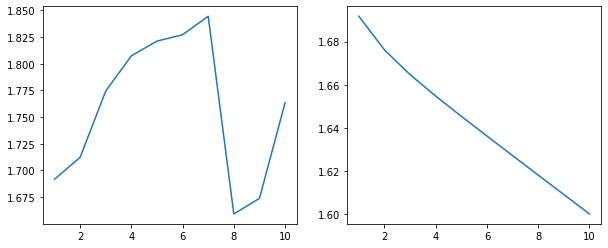

In [110]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

sgd1 = StochasticGD(n_iter = 10, eta = .01).fit(X,y)
ax[0].plot(range(1, len(sgd1.cost_) + 1), np.log10(sgd1.cost_))

sgd2 = AdalineGD(n_iter = 10, eta = .0001).fit(X,y)
ax[1].plot(range(1, len(sgd2.cost_) + 1), np.log10(sgd2.cost_))